In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras import layers
from tensorflow import keras
from keras import Sequential

c:\Users\Yuvraj\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data_train_path= 'Fruits_Vegetables/train'
data_test_path= 'Fruits_Vegetables/test'
data_validation_path= 'Fruits_Vegetables/validation'

In [3]:
image_width = 180
image_height= 180

In [4]:
data_train= tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size= (image_width,image_height),
    batch_size= 32,
    validation_split=False
)

Found 3115 files belonging to 36 classes.


In [5]:
data_cat= data_train.class_names

In [6]:
data_val= tf.keras.utils.image_dataset_from_directory(
    data_validation_path,
    image_size = (image_height,image_width),
    batch_size= 32,
    shuffle=False,
    validation_split=False
)

Found 351 files belonging to 36 classes.


In [7]:
data_test= tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    image_size = (image_height,image_width),
    batch_size= 32,
    shuffle=False,
    validation_split=False
)

Found 359 files belonging to 36 classes.


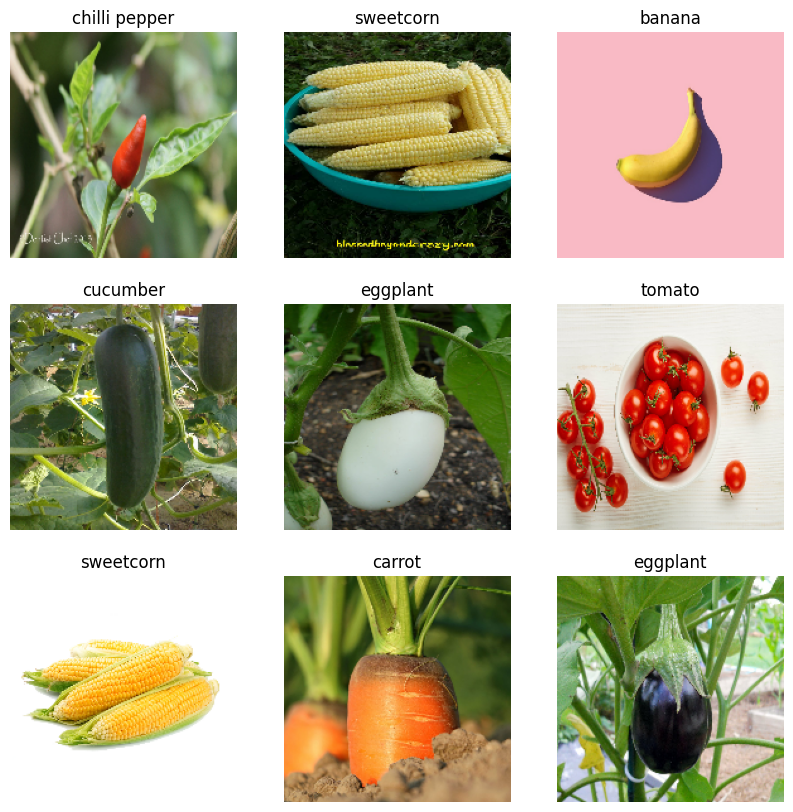

In [8]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [9]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [10]:
model = keras.Sequential([
    layers.Rescaling(1./255, input_shape=(180, 180, 3)),
    layers.Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(180, 180, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(64, activation='softmax')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 64)        1

In [12]:

model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 64)        1

In [14]:
history =model.fit(data_train,validation_data=data_val,epochs=25)

Epoch 1/25


98/98 [==============================] - 162s 2s/step - loss: 3.5573 - accuracy: 0.0819 - val_loss: 2.7029 - val_accuracy: 0.2422
Epoch 2/25
98/98 [==============================] - 135s 1s/step - loss: 2.7716 - accuracy: 0.2032 - val_loss: 2.1030 - val_accuracy: 0.4131
Epoch 3/25
98/98 [==============================] - 136s 1s/step - loss: 2.3833 - accuracy: 0.2963 - val_loss: 1.5137 - val_accuracy: 0.6097
Epoch 4/25
98/98 [==============================] - 134s 1s/step - loss: 2.0635 - accuracy: 0.3881 - val_loss: 1.2405 - val_accuracy: 0.6724
Epoch 5/25
98/98 [==============================] - 129s 1s/step - loss: 1.7148 - accuracy: 0.4912 - val_loss: 0.8535 - val_accuracy: 0.7607
Epoch 6/25
98/98 [==============================] - 130s 1s/step - loss: 1.4150 - accuracy: 0.5599 - val_loss: 0.5985 - val_accuracy: 0.8462
Epoch 7/25
98/98 [==============================] - 131s 1s/step - loss: 1.0992 - accuracy: 0.6494 - val_loss: 0.4385 - val_accuracy: 0.9174
Epoch 8/25


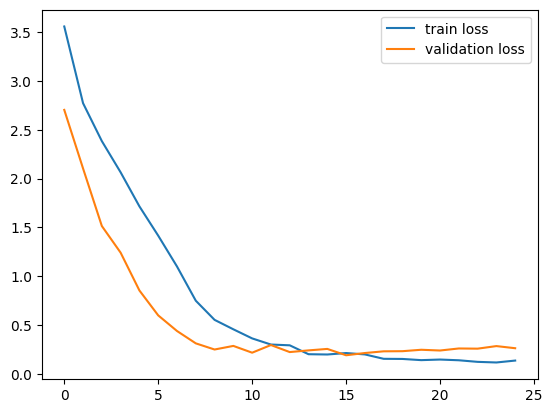

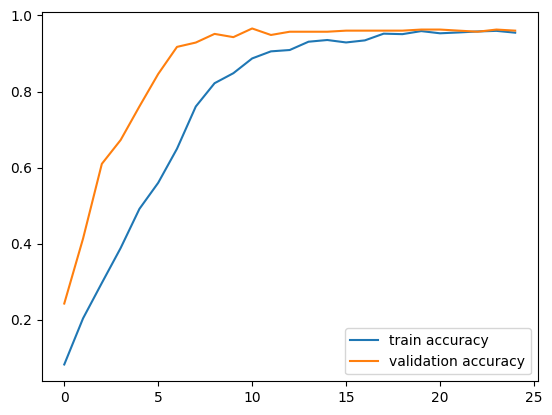

In [16]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

In [17]:
image= 'Fruits_Vegetables/test/apple/Image_2.jpg'
image=tf.keras.utils.load_img(image, target_size=(image_height,image_width))
img_arr= tf.keras.utils.array_to_img(image)
img_bat= tf.expand_dims(img_arr,0)

In [18]:
predict=model.predict(img_bat)

1/1 [==============================] - 4s 4s/step


In [19]:
score= tf.nn.softmax(predict)

In [ ]:
print('{} acc {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))